In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix

from imblearn.over_sampling import SMOTE

%matplotlib inline

sns.set_style('darkgrid')

In [2]:
data = pd.read_csv('Company_Data.csv')

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data['Urban'] = LabelEncoder().fit_transform(data.Urban)

In [5]:
data['ShelveLoc'] = LabelEncoder().fit_transform(data.ShelveLoc)

In [6]:
data['US'] = LabelEncoder().fit_transform(data.US)

In [7]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
ShelveLoc,400.0,1.307500,0.833475,0.0,1.00,2.00,2.00,2.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00
Urban,400.0,0.705000,0.456614,0.0,0.00,1.00,1.00,1.00


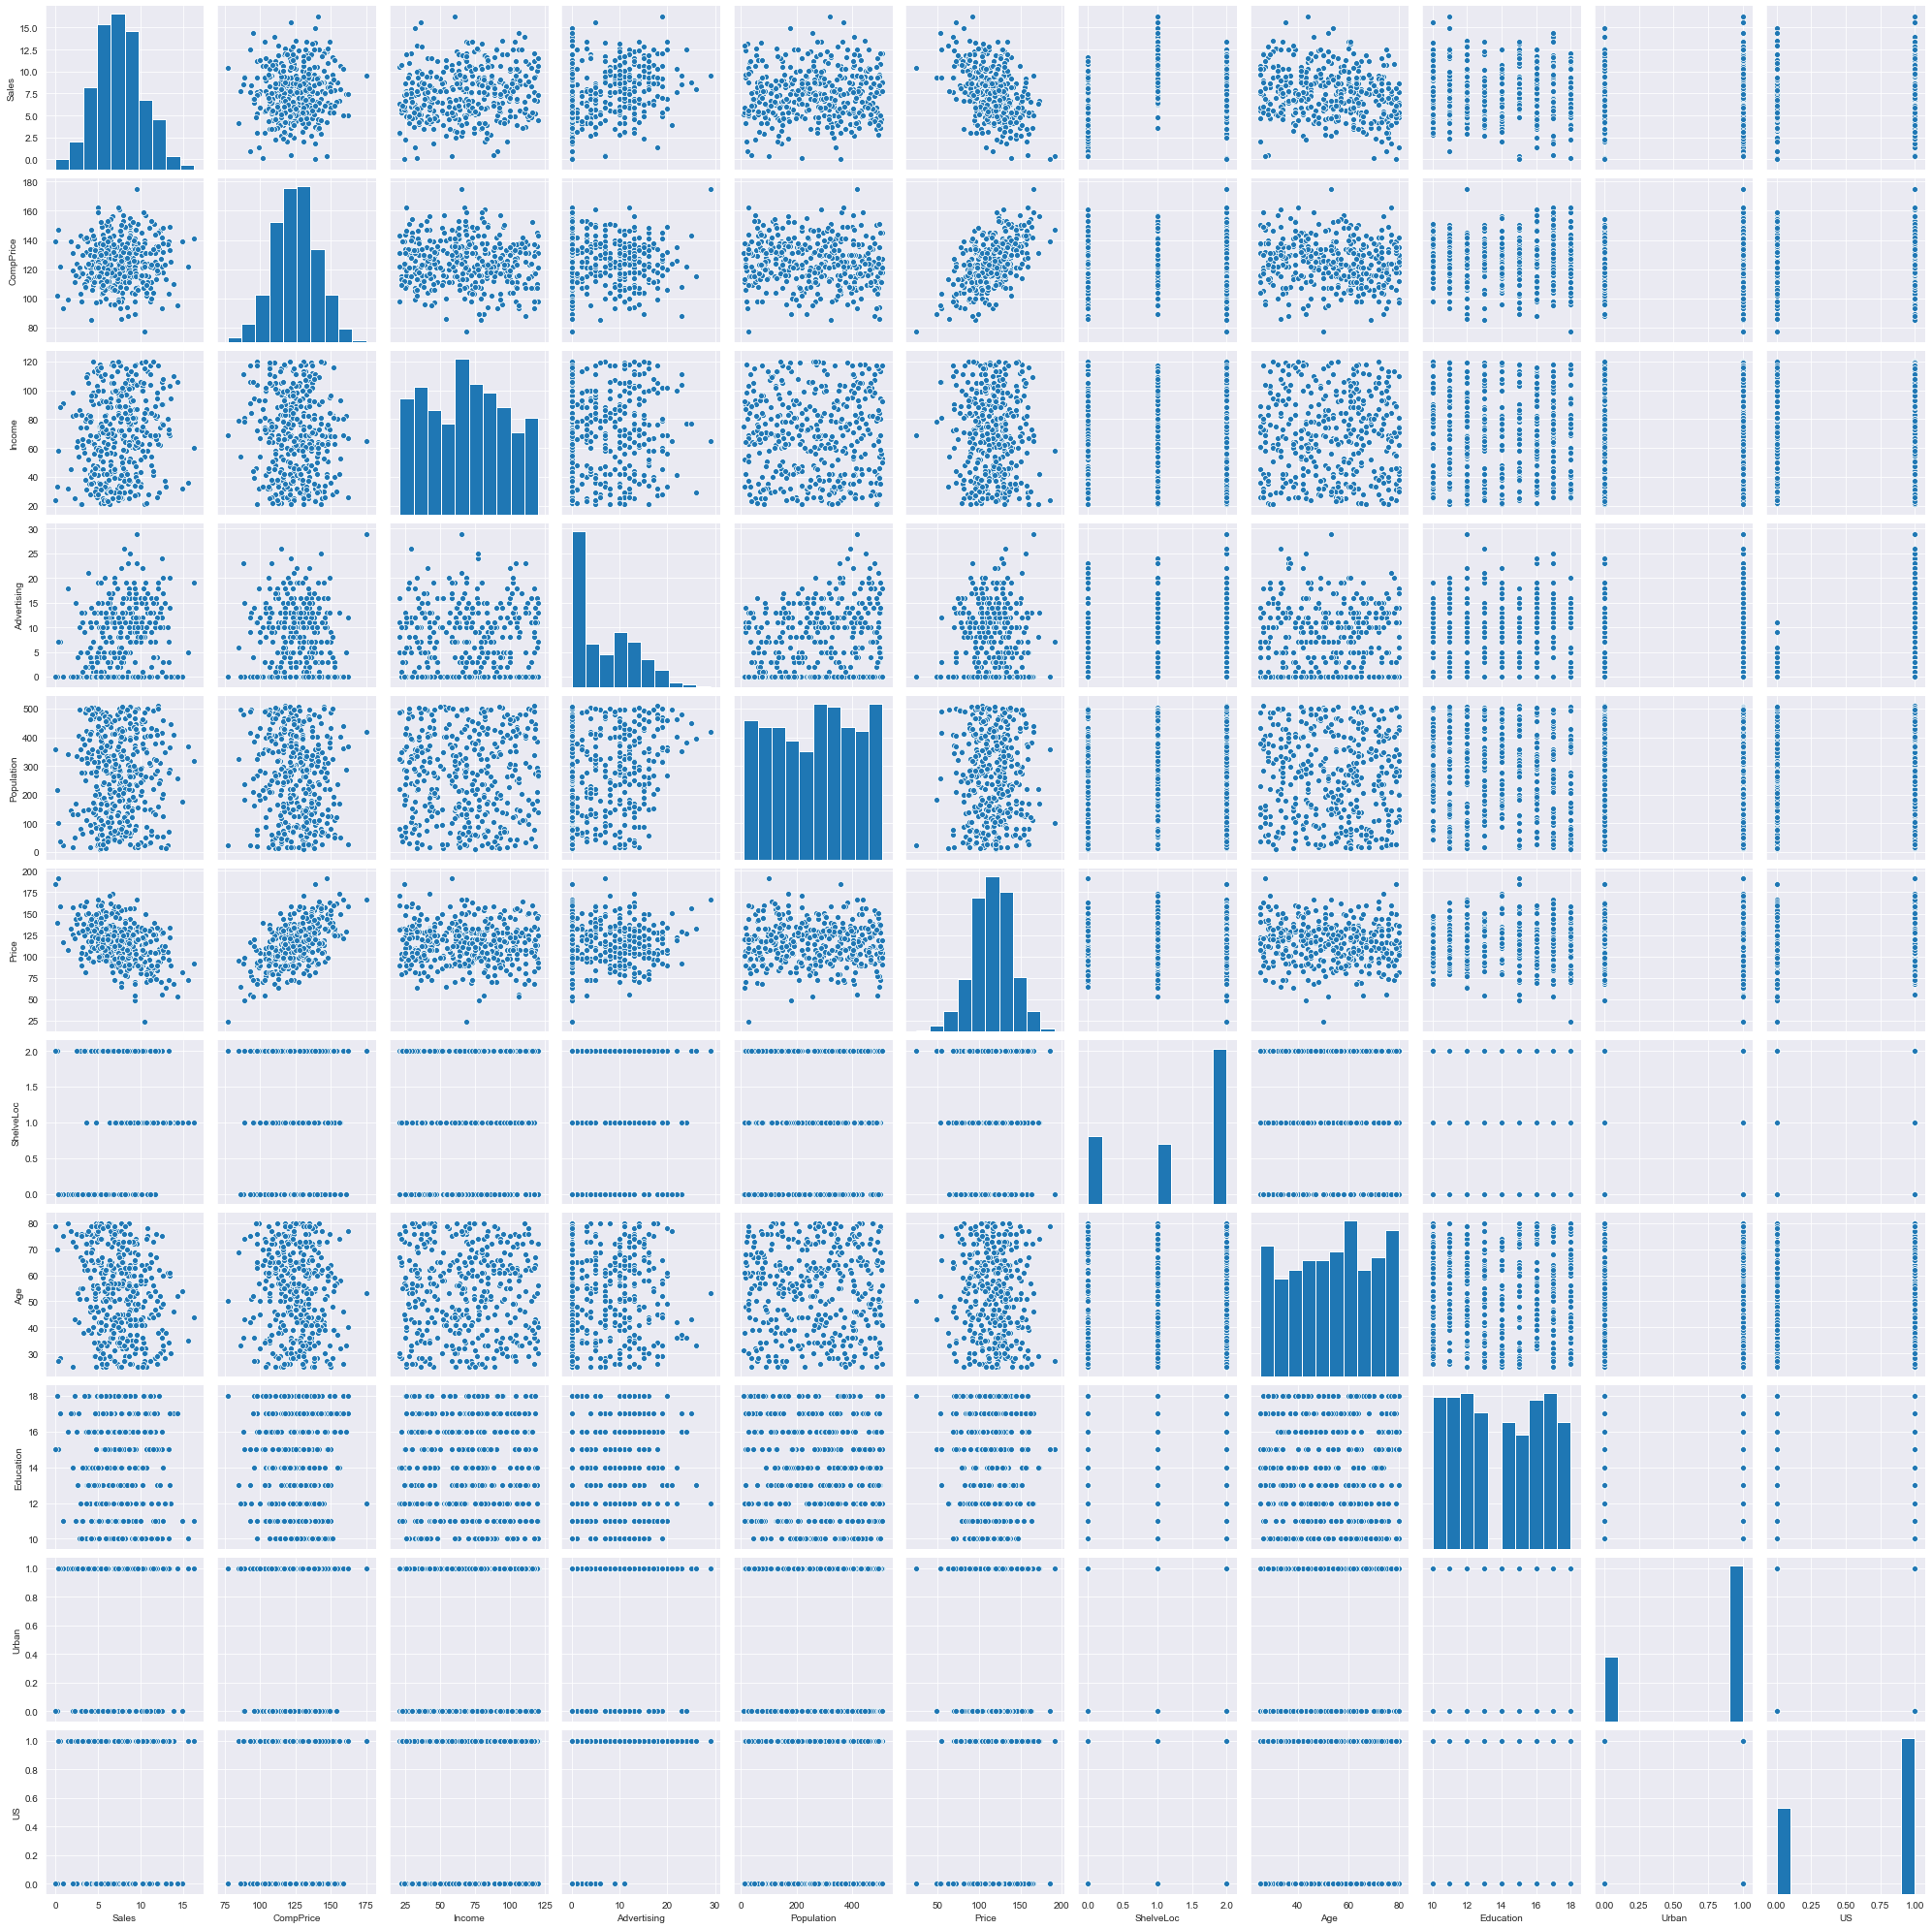

In [9]:
#sns.pairplot(data= data)

plt.show()

In [10]:
corr = data.corr()

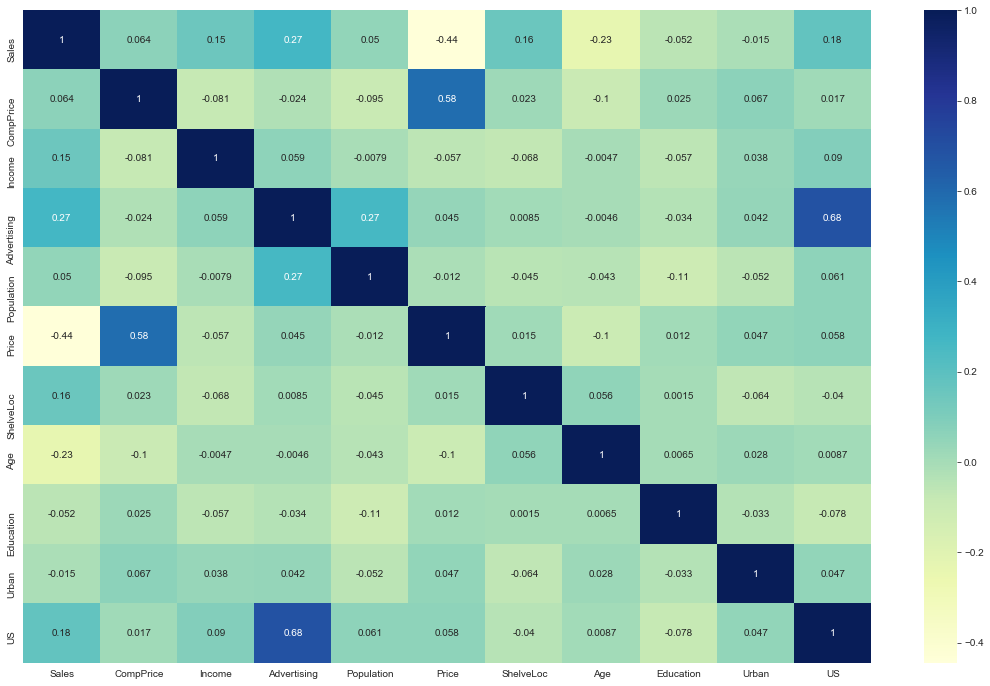

In [11]:
plt.figure(figsize=(19,12))

sns.heatmap(corr , annot = True,cmap= 'YlGnBu')

plt.show()

In [12]:
data['Sold']= 0

for x in range(0,len(data['Sales'])):
    if(data['Sales'].iloc[x]<=7.496):
        data['Sold'].iloc[x] = 0
    else:
        data['Sold'].iloc[x] = 1

/Users/anupprakash/Anaconda4/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sold
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [38]:
def RandFor(data):
    xTrain,xTest ,yTrain,yTest = train_test_split(data.drop('Sold',1),data.Sold,test_size=0.2)
    ss = SMOTE(k_neighbors= 3)
    xTrain,yTrain = ss.fit_sample(xTrain,yTrain)
    rf = RandomForestClassifier(criterion= 'entropy',n_estimators= 500,max_depth= 2)
    dt = rf.fit(xTrain,yTrain)
    pred = dt.predict(xTest)
    
    score = pd.DataFrame({'TrainingScore':dt.score(xTrain,yTrain),
                         'TestingScore':dt.score(xTest,yTest),
                         'AccuracyScore':accuracy_score(yTest,pred)}
                         ,index=[0],
)
    
    sns.heatmap(confusion_matrix(yTest,pred),annot = True,
                xlabel='Predicted Value',ylabel='Truth Value')
    print(confusion_matrix(yTest,pred))
    
    return score

AttributeError: 'QuadMesh' object has no property 'xlabel'

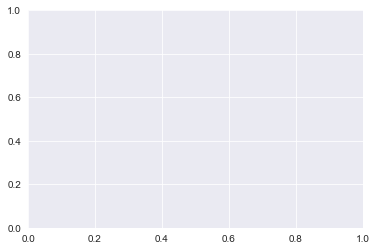

In [39]:
score = RandFor(data)

In [22]:
score

,TrainingScore,TestingScore,AccuracyScore
0,1.0,1.0,1.0
